## 内存的工作原理

假设你去看演出，需要将东西寄存。寄存处有一个柜子，柜子有很多抽屉：

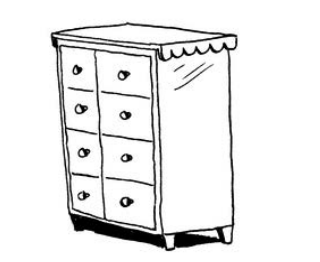

每个抽屉可放一样东西，你有两样东西要寄存，因此要了两个抽屉：

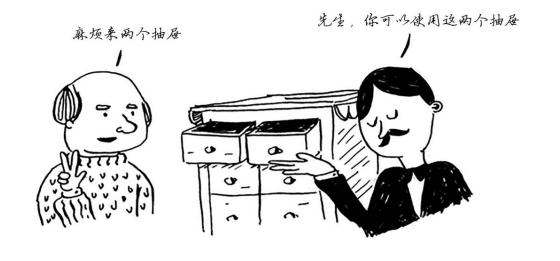

你将两样东西存放在这里：

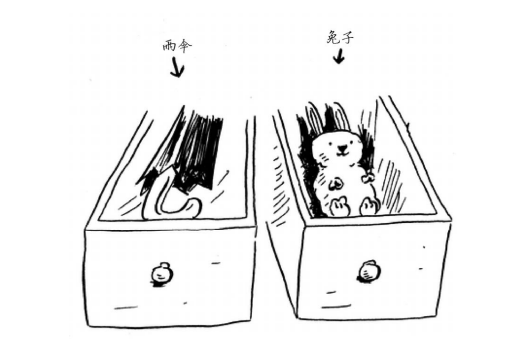

这大致就是计算机内存的工作原理。计算机就像是很多抽屉的集合体，每个抽屉都有地址：

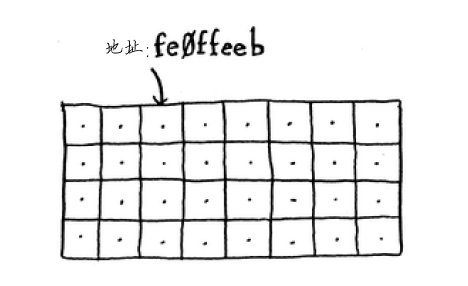

fe0ffeeb是一个内存单元的地址。

需要将数据存储到内存时，你请求计算机提供存储空间，计算机给你一个存储地址。需要存储多项数据时，有两种基本方式——数组和链表。

## 数组和链表

有时候，需要在内存中存储一系列元素。假设你要编写一个管理待办事项的应用程序，为此需要将这些待办事项存储在内存中。

使用数组意味着所有待办事项在内存中都是相连的（紧靠在一起的）。

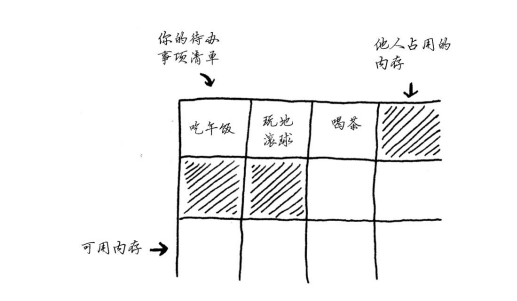

现在假设你要添加第四个待办事项，但后面的那个抽屉放着别人的东西！

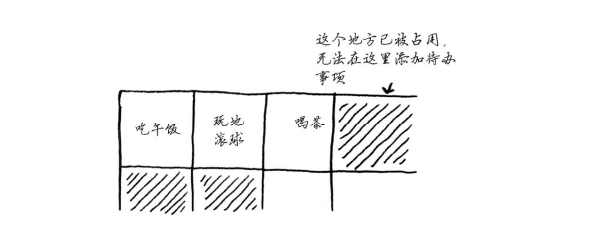

这就像你与朋友去看电影，找到地方就坐后又来了一位朋友，但原来坐的地方没有空位置，只得再找一个可坐下所有人的地方。

解决方法有“预留座位”：即便当前只有3个待办事项，也请计算机提供10个位置，以防需要添加待办事项。

但是这种方法存在着两个缺点：

1. 你额外请求的位置可能根本用不上，这将浪费内存。你没有使用，别人也用不了。
2. 待办事项超过10个后，你还得转移。

因此，这种权宜措施虽然不错，但绝非完美的解决方案。

为此可以使用的方法是：链表。

链表中的元素可存储在内存的任何地方：

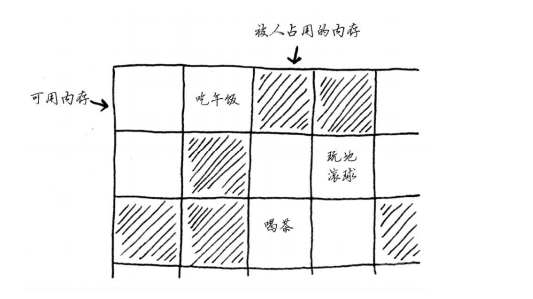

链表的每个元素都存储了下一个元素的地址，从而使一系列随机的内存地址串在一起。

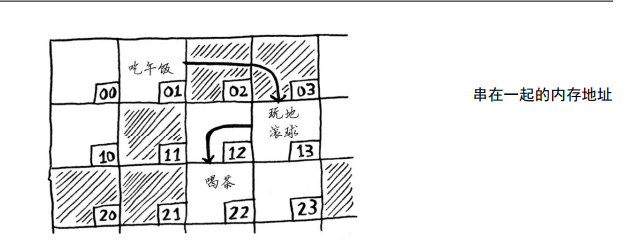

使用链表时，根本就不需要移动元素。这还可避免另一个问题。假设你与五位朋友去看一部很火的电影。你们六人想坐在一起，但看电影的人较多，没有六个在一起的座位。使用数组时有时就会遇到这样的情况。假设你要为数组分配10 000个位置，内存中有10 000个位置，但不都靠在一起。在这种情况下，你将无法为该数组分配内存！链表相当于说“我们分开来坐”，因此，只要有足够的内存空间，就能为链表分配内存。

链表的优势在插入元素方面，而缺点在于：在需要读取链表的最后一个元素时，你不能直接读取，因为你不知道它所处的地址，必须先访问元素#1，从中获取元素#2的地址，再访问元素#2并从中获取元素#3的地址，以此类推，直到访问最后一个元素。

需要同时读取所有元素时，链表的效率很高：你读取第一个元素，根据其中的地址再读取第二个元素，以此类推。但如果你需要跳跃，链表的效率真的很低。

数组与此不同：你知道其中每个元素的地址。

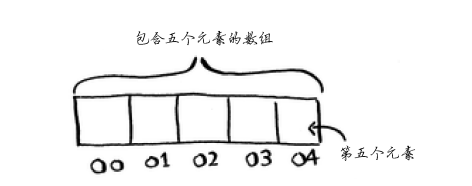

只需执行简单的数学运算就知道：04。需要随机地读取元素时，数组的效率很高，因为可迅速找到数组的任何元素。

假设你要让待办事项按日期排列。之前，你在清单末尾添加了待办事项。

但现在你要根据新增待办事项的日期将其插入到正确的位置：

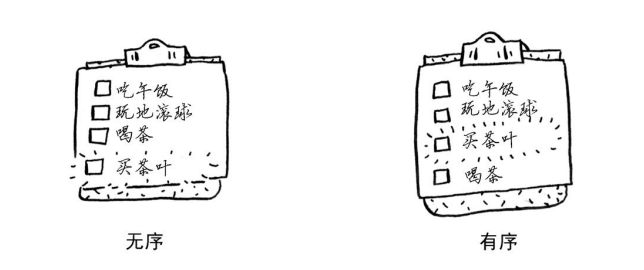

**需要在中间插入元素时，数组和链表哪个更好呢？**

使用链表时，插入元素很简单，只需修改它前面的那个元素指向的地址：

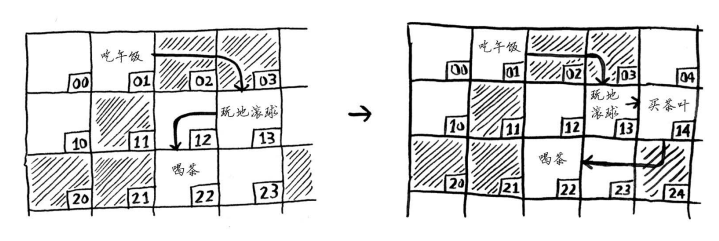

而使用数组时，则必须将后面的元素都向后移。

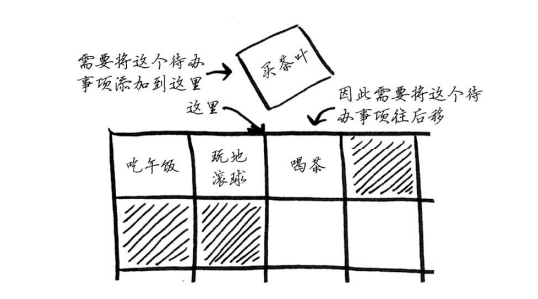

如果没有足够的空间，可能还得将整个数组复制到其他地方！因此，当需要在中间插入元素时，链表是更好的选择。

**如果你要删除元素呢？**

链表也是更好的选择，因为只需修改前一个元素指向的地址即可。而使用数组时，删除元素后，必须将后面的元素都向前移。

不同于插入，删除元素总能成功。如果内存中没有足够的空间，插入操作可能失败，但在任何情况下都能够将元素删除。

下面是常见数组和链表操作的运行时间：

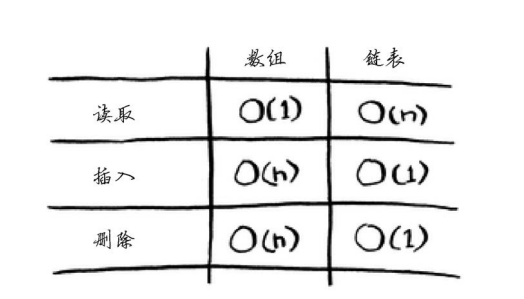

## 选择排序

选择排序的逻辑如下所示：

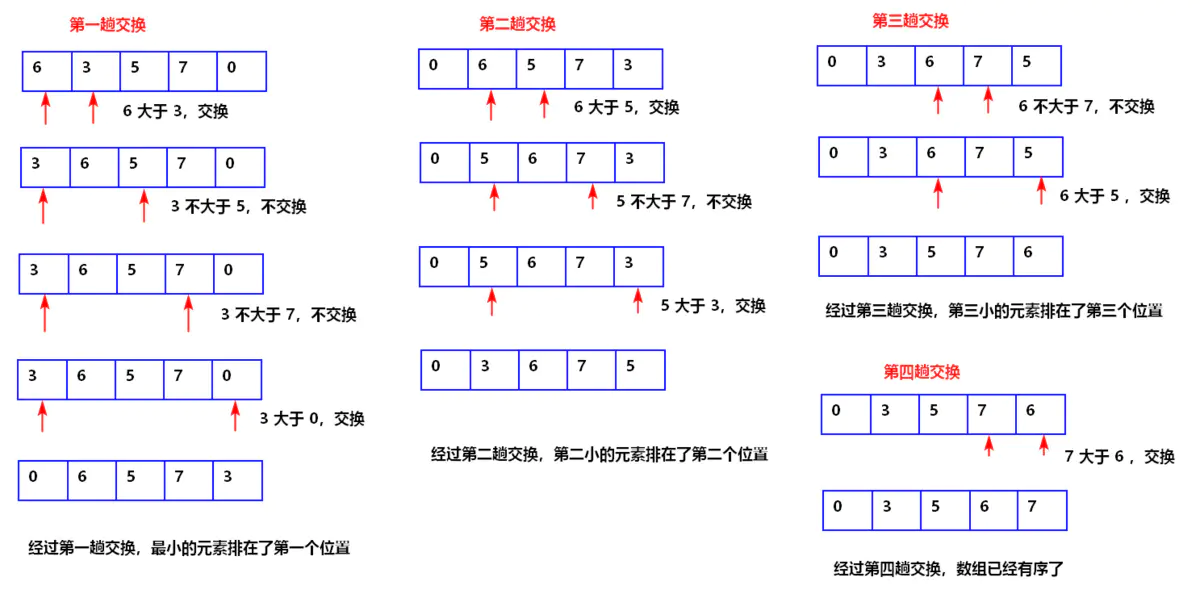

我们可以理解为：

1. 第1趟比较：拿第1个元素依次和它后面的每个元素进行比较，如果第1个元素大于后面某个元素，交换它们，经过第1趟比较，数组中最小的元素被选出，它被排在第一位
2. 第2趟比较：拿第2个元素依次和它后面的每个元素进行比较，如果第2个元素大于后面某个元素，交换它们，经过第2趟比较，数组中第2小的元素被选出，它被排在第二位
3. 第n-1趟比较：第n-1个元素和第n个元素作比较，如果第n-1个元素大于第n个元素，交换它们


In [2]:
# 我们先实现一个用来找出数组中最小元素的函数

def findSmallest(arr):
    smallest = arr[0]  # 我们先存储传入的array的第一个元素（索引为0）
    smallest_index = 0
    
    for i in range(1, len(arr)):  # 进行遍历
        if arr[i] < smallest:  # 如果有更小的数字
            smallest = arr[i]  # 则让最小的数字等于这个数字
            smallest_index = i  # 并且将索引值替换为该数字所在的位置的索引值
    return smallest_index  # 返回这个索引值

# 我们来实现一个选择排序算法

def selectionSort(arr):  # 传入一个arr作为参数
    newArr = []  # 创建一个新的列表
    for i in range(len(arr)):  # 我们进行遍历
        smallest = findSmallest(arr)  # 调用找到数组中最小元素的函数
        newArr.append(arr.pop(smallest))  # 将这个数组弹出，并且加入到newArr种
    return newArr  # 返回这个newArr

In [3]:
print(selectionSort([10, 6, 3, 7, 8, 9]))

[3, 6, 7, 8, 9, 10]
